In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\shraddha\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Grayscale Image')

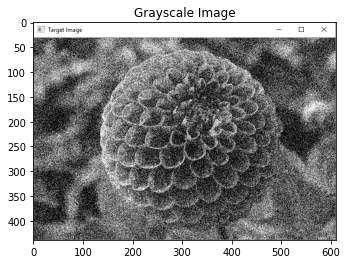

In [3]:
img_bgr = cv2.imread("noisy-grayscale.png")
img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap = 'gray')
plt.title("Grayscale Image")

# Non-linear filters

## Median filter
provides less blurring than linear smoothing filters

useful for denoising both bipolar (pepper & salt) and unipolar impulse noise. (50th percentile)

Text(0.5, 1.0, 'Median fliter')

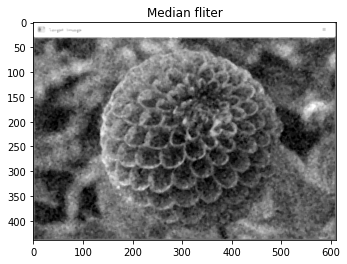

In [4]:
median = cv2.medianBlur(img, 5)   #size of kernal = 5
plt.imshow(median, cmap = 'gray')
plt.title("Median fliter")

## Max Filter
reduces pepper noise (100th percentile)

Text(0.5, 1.0, 'Max fliter')

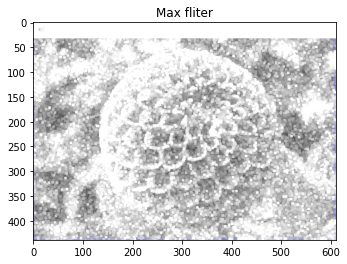

In [5]:
from PIL import Image, ImageFilter
img1 = Image.open("noisy-grayscale.png")
max_filter = img1.filter(ImageFilter.MaxFilter(size = 5))
plt.imshow(max_filter, cmap = 'gray')
plt.title("Max fliter")

## Min Filter
reduces salt noise (0 percentile)

Text(0.5, 1.0, 'Min fliter')

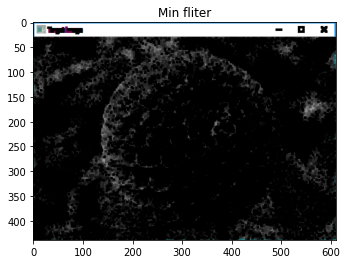

In [6]:
from PIL import Image, ImageFilter
img1 = Image.open("noisy-grayscale.png")
min_filter = img1.filter(ImageFilter.MinFilter(size = 5))
plt.imshow(min_filter, cmap = 'gray')
plt.title("Min fliter")

# Linear/ Mean filters

## Box filters

Text(0.5, 1.0, 'averaging box filter')

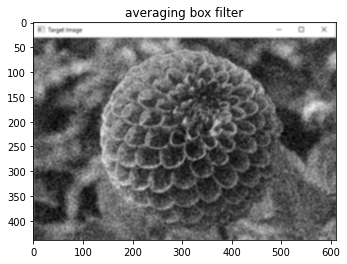

In [7]:
kernel = np.ones((5,5), np.float32)/25
box = cv2.filter2D(img, -1, kernel)
plt.imshow(box, cmap = "gray")
plt.title("averaging box filter")

## Gaussian Filter
denoising gaussian noise

Text(0.5, 1.0, 'Gaussian fliter')

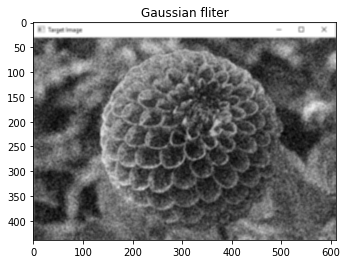

In [8]:
gaussian = cv2.GaussianBlur(img, (5,5), 3, cv2.BORDER_DEFAULT)
plt.imshow(gaussian, cmap = 'gray')
plt.title("Gaussian fliter")

## Geometric Mean Filters

Text(0.5, 1.0, 'geometric mean 5x5 kernel')

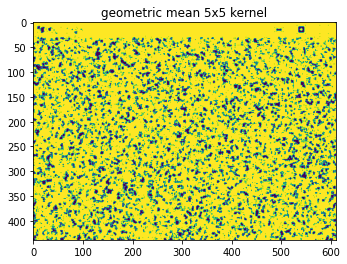

In [9]:
rows, cols = box.shape[:2]
ksize = 5

padsize = int((ksize-1)/2)
pad_img = cv2.copyMakeBorder(box, *[padsize]*4, cv2.BORDER_DEFAULT)
geomean = np.zeros_like(box)
for r in range(rows):
    for c in range(cols):
        geomean[r, c] = np.prod(pad_img[r:r+ksize, c:c+ksize])**(1/(ksize**2))
plt.imshow(geomean)
plt.title('geometric mean 5x5 kernel')

## Harmonic Mean Filters

Text(0.5, 1.0, 'harmonicmean  5x5 kernel')

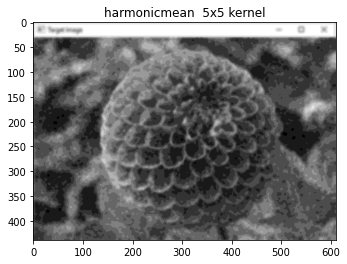

In [10]:
harmonicmean = np.zeros_like(box)
for r in range(rows):
    for c in range(cols):
        harmonicmean[r, c] = 1/np.sum(1/pad_img[r:r+ksize, c:c+ksize])
harmonicmean = harmonicmean*ksize**2
plt.imshow(harmonicmean, cmap = 'gray')
plt.title('harmonicmean  5x5 kernel')

## Laplacian filters

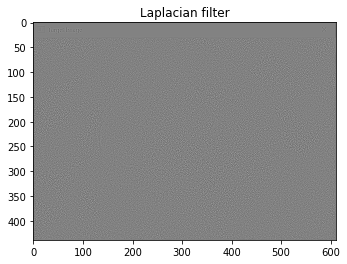

In [11]:
img=(img*255).astype(np.uint8)
laplacian = cv2.Laplacian(img, cv2.CV_64F, 7)
plt.imshow(laplacian, cmap = 'gray')
plt.title('Laplacian filter')
plt.show()

## Detecting type of noise

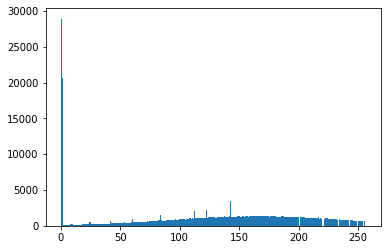

In [12]:
plt.hist(img.ravel(), 256,[0,256])
plt.show()

salt & pepper noise

## Noise calculation

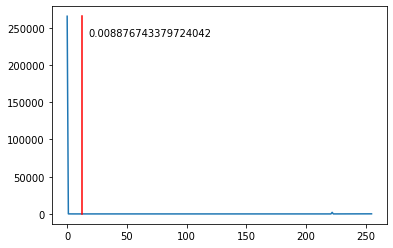

In [13]:
image_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
s = cv2.calcHist([image_hsv], [1], None, [256], [0, 256])

p = 0.05
s_perc = np.sum(s[int(p * 255):-1]) / np.prod(image_hsv.shape[0:2])
    
plt.plot(s)
plt.plot([p * 255, p * 255], [0, np.max(s)], 'r')
plt.text(p * 255 + 5, 0.9 * np.max(s), str(s_perc))
plt.show()

In [14]:
img_slice = img[150: 600, 150: 600]
img_slice.shape

(289, 450)

In [15]:
sli = img[:2]
sli.shape

(2, 611)

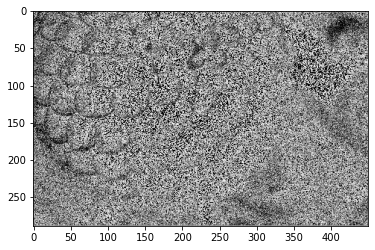

In [16]:
plt.imshow(img_slice, cmap = 'gray')

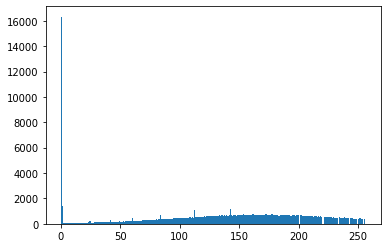

In [17]:
plt.hist(img_slice.ravel(), 256,[0,256])
plt.show()

pepper noise

# Edge Detection

## LoG

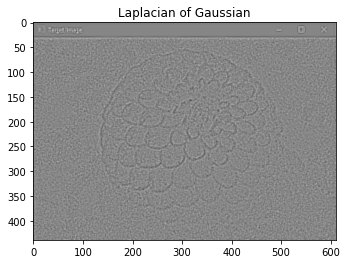

In [18]:
log = cv2.Laplacian(gaussian, cv2.CV_64F, 5) 

plt.imshow(log, cmap = 'gray')
plt.title('Laplacian of Gaussian')
plt.show()

## DoG

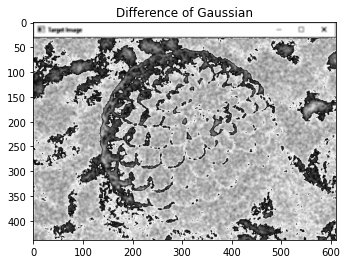

In [19]:
gaussian2 = cv2.GaussianBlur(img, (5,5), 7, cv2.BORDER_DEFAULT)
dog = gaussian - gaussian2
plt.imshow(dog, cmap = 'gray')
plt.title('Difference of Gaussian')
plt.show()

## Canny

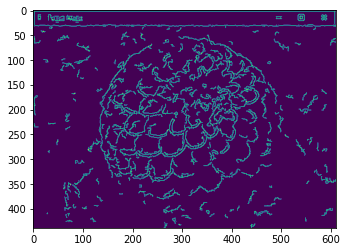

In [20]:
cannyedges = cv2.Canny(gaussian,100,200)
plt.imshow(cannyedges)

## Sobel

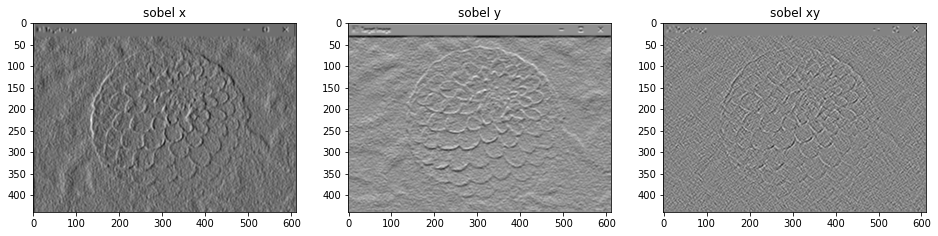

In [21]:
sobelx = cv2.Sobel(gaussian, cv2.CV_64F, 1, 0, 3)
sobely = cv2.Sobel(gaussian, cv2.CV_64F, 0, 1, 3)
sobelxy = cv2.Sobel(gaussian, cv2.CV_64F, 1, 1, 3)
plt.figure(figsize=(16, 16))

plt.subplot(1,3,1),
plt.imshow(sobelx,cmap = 'gray')
plt.title('sobel x')

plt.subplot(1,3,2),
plt.imshow(sobely,cmap = 'gray')
plt.title('sobel y')


plt.subplot(1,3,3),
plt.imshow(sobelxy,cmap = 'gray')
plt.title('sobel xy')
plt.show()

magnitude and orientation

In [22]:
import argparse
# compute the gradient magnitude and orientation respectively
mag = np.sqrt((sobelx ** 2) + (sobely ** 2))
orientation = np.arctan2(sobely, sobelx) * (180 / np.pi) % 180

# construct the argument parser and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", required=True, help="Path to the image")
ap.add_argument("-l", "--lower-angle", type=float, default=175.0,
    help="Lower orientation angle")
ap.add_argument("-u", "--upper-angle", type=float, default=180.0,
    help="Upper orientation angle")
args = vars(ap.parse_args())

# find all pixels that are within the upper and low angle boundaries
idxs = np.where(orientation >= args["lower_angle"], orientation, -1)
idxs = np.where(orientation <= args["upper_angle"], idxs, -1)
mask = np.zeros(gray.shape, dtype="uint8")
mask[idxs > -1] = 255
  
# show the images
cv2.imshow("Mask", mask)

usage: ipykernel_launcher.py [-h] -i IMAGE [-l LOWER_ANGLE] [-u UPPER_ANGLE]
ipykernel_launcher.py: error: the following arguments are required: -i/--image


SystemExit: 2

c:\users\shraddha\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3449: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


## Prewitt

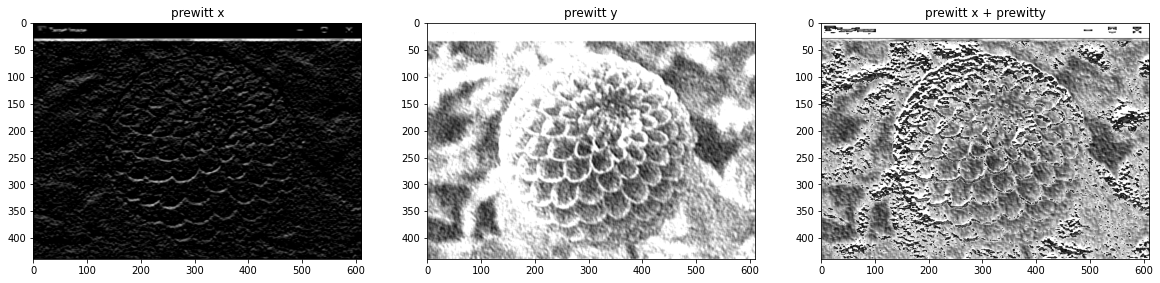

In [23]:
kernelx = np.array([[1,1,1], [0,0,0], [-1,-1,-1]])
kernely = np.array([[1,0,1],[-1,0,1],[-1,0,1]])
prewittx = cv2.filter2D(gaussian, -1, kernelx)
prewitty = cv2.filter2D(gaussian, -1, kernely)

plt.figure(figsize = (20,20))
plt.subplot(1,3,1),
plt.imshow(prewittx,cmap = 'gray')
plt.title('prewitt x')

plt.subplot(1,3,2),
plt.imshow(prewitty,cmap = 'gray')
plt.title('prewitt y')


plt.subplot(1,3,3),
plt.imshow(prewittx+prewitty,cmap = 'gray')
plt.title('prewitt x + prewitty')
plt.show()

## Kirsch Filter

In [24]:
from scipy import ndimage

north = np.array([[-3,-3,5], [-3,0,5], [-3,-3,5]])
north_west = np.array([[-3,5,5], [-3,0,5], [-3,-3,-3]])
west = np.array([[5,5,5], [-3,0,-3], [-3,-3,-3]])
south_west = np.array([[5,5,-3], [5,0,-3], [-3,-3,-3]])
south = np.array([[5,-3,-3], [5,0,-3], [5,-3,-3]])
south_east = np.array([[-3,-3,-3], [5,0,-3], [5,5,-3]])
east = np.array([[-3,-3,-3], [-3,0,-3], [5,5,5]])
north_east = np.array([[-3,-3,-3], [-3,0,5], [-3,5,5]])

n = ndimage.convolve(img, north)
nw= ndimage.convolve(img, north_west)
w = ndimage.convolve(gaussian, west)
sw= ndimage.convolve(gaussian, south_west)
s = ndimage.convolve(gaussian, south)
se= ndimage.convolve(gaussian, south_east)
e = ndimage.convolve(gaussian, east)
ne= ndimage.convolve(gaussian, north_east)


Text(0.5, 1.0, 'kirsch nw')

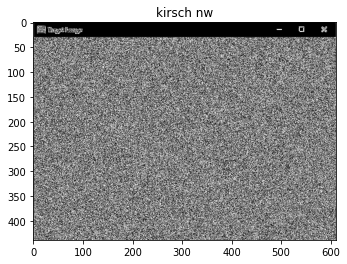

In [25]:
#plt.figure(figsize = (15,15))
#plt.subplot(1,8,1),
plt.imshow(nw,cmap = 'gray')
plt.title('kirsch nw')

# plt.subplot(1,8,2),
# plt.imshow(nw ,cmap = 'gray')
# plt.title('kirsch nw')

# plt.subplot(1,8,3),
# plt.imshow(w,cmap = 'gray')
# plt.title('kirsch w')

# plt.subplot(1,8,4),
# plt.imshow(sw,cmap = 'gray')
# plt.title('kirsch sw')

# plt.subplot(2,8,5)
# plt.imshow(w,cmap = 'gray')
# plt.title('kirsch w')

# plt.subplot(2,8,5)
# plt.imshow(w,cmap = 'gray')
# plt.title('kirsch w')


## Wiener filter

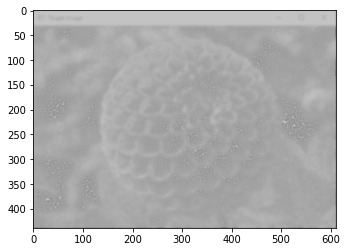

In [26]:
from scipy.signal import wiener
weiner = wiener(gaussian, (5,5))
plt.imshow(weiner,cmap = 'gray')

## Otsu threshold

Text(0.5, 1.0, 'otsu Threshold')

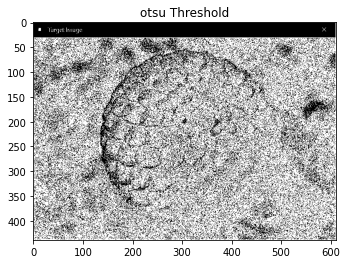

In [27]:
ret, thresh1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(thresh1, cmap = 'gray')
plt.title("otsu Threshold")

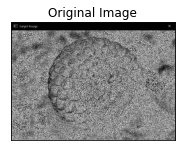

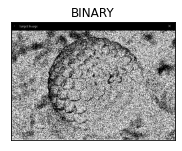

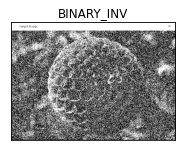

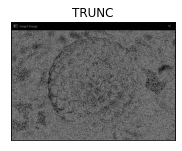

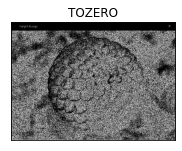

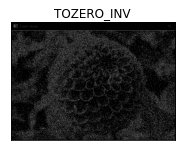

In [28]:

ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.figure(figsize=(10,10))
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# Morphology

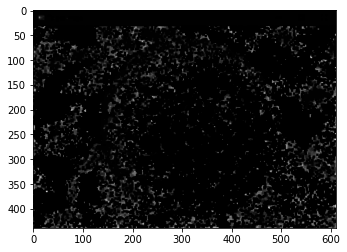

In [35]:
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)
plt.imshow(erosion, cmap = 'gray')

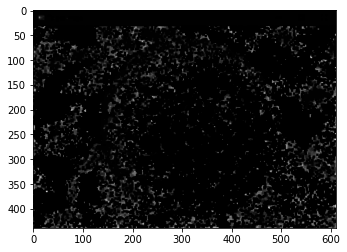

In [36]:
dilation = cv2.erode(img,kernel,iterations = 1)
plt.imshow(dilation, cmap = 'gray')